In [2]:
import sys
import pandas as pd 
from sqlalchemy import create_engine

In [19]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
messages_filepath="C://DS_project//Diasaster_response_team7//disaster-response-pipelines-main//data//disaster_messages.csv" 
categories_filepath="C://DS_project//Diasaster_response_team7//disaster-response-pipelines-main//data//disaster_categories.csv"
messages = pd.read_csv(messages_filepath)
categories = pd.read_csv(categories_filepath)
df = pd.merge(messages, categories, on='id')
print(df)
categories.head()

          id                                            message  \
0          2  Weather update - a cold front from Cuba that c...   
1          7            Is the Hurricane over or is it not over   
2          8                    Looking for someone but no name   
3          9  UN reports Leogane 80-90 destroyed. Only Hospi...   
4         12  says: west side of Haiti, rest of the country ...   
...      ...                                                ...   
26381  30261  The training demonstrated how to enhance micro...   
26382  30262  A suitable candidate has been selected and OCH...   
26383  30263  Proshika, operating in Cox's Bazar municipalit...   
26384  30264  Some 2,000 women protesting against the conduc...   
26385  30265  A radical shift in thinking came about as a re...   

                                                original   genre  \
0      Un front froid se retrouve sur Cuba ce matin. ...  direct   
1                     Cyclone nan fini osinon li pa fini  d

,id,categories
0,2,related-1;request-0;offer-0;aid_related-0;medi...
1,7,related-1;request-0;offer-0;aid_related-1;medi...
2,8,related-1;request-0;offer-0;aid_related-0;medi...
3,9,related-1;request-1;offer-0;aid_related-1;medi...
4,12,related-1;request-0;offer-0;aid_related-0;medi...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26386 entries, 0 to 26385
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          26386 non-null  int64 
 1   message     26386 non-null  object
 2   original    10246 non-null  object
 3   genre       26386 non-null  object
 4   categories  26386 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.2+ MB


In [5]:
print(df.isnull().sum())

id                0
message           0
original      16140
genre             0
categories        0
dtype: int64


### Dealing_with_missing_values 
So, we have alot of missing values in the "orginial" column. we can drop the column orginial

In [6]:
updated_df = df.dropna(axis=1)

In [7]:
updated_df


,id,message,genre,categories
0,2,Weather update - a cold front from Cuba that c...,direct,related-1;request-0;offer-0;aid_related-0;medi...
1,7,Is the Hurricane over or is it not over,direct,related-1;request-0;offer-0;aid_related-1;medi...
2,8,Looking for someone but no name,direct,related-1;request-0;offer-0;aid_related-0;medi...
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,related-1;request-1;offer-0;aid_related-1;medi...
4,12,"says: west side of Haiti, rest of the country ...",direct,related-1;request-0;offer-0;aid_related-0;medi...
...,...,...,...,...
26381,30261,The training demonstrated how to enhance micro...,news,related-0;request-0;offer-0;aid_related-0;medi...
26382,30262,A suitable candidate has been selected and OCH...,news,related-0;request-0;offer-0;aid_related-0;medi...
26383,30263,"Proshika, operating in Cox's Bazar municipalit...",news,related-1;request-0;offer-0;aid_related-0;medi...
26384,30264,"Some 2,000 women protesting against the conduc...",news,related-1;request-0;offer-0;aid_related-1;medi...


In [8]:

categories.head()

,id,categories
0,2,related-1;request-0;offer-0;aid_related-0;medi...
1,7,related-1;request-0;offer-0;aid_related-1;medi...
2,8,related-1;request-0;offer-0;aid_related-0;medi...
3,9,related-1;request-1;offer-0;aid_related-1;medi...
4,12,related-1;request-0;offer-0;aid_related-0;medi...


In [9]:
categories = df['categories'].str.split(pat=';', expand=True)
categories.head()


,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
1,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
3,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
4,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


In [10]:
# select the first row of the categories dataframe
row_names= categories.loc[0]
colnames = []
for entry in row_names:
    colnames.append(entry[:-2])
category_colnames = colnames
print(category_colnames)


['related', 'request', 'offer', 'aid_related', 'medical_help', 'medical_products', 'search_and_rescue', 'security', 'military', 'child_alone', 'water', 'food', 'shelter', 'clothing', 'money', 'missing_people', 'refugees', 'death', 'other_aid', 'infrastructure_related', 'transport', 'buildings', 'electricity', 'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure', 'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold', 'other_weather', 'direct_report']


In [11]:
# rename the columns of `categories`
categories.columns = category_colnames
categories.head()


,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
1,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
3,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
4,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


In [12]:
for column in categories:
    # set each value to be the last character of the string
    categories[column] = categories[column].str[-1:]
    
    # convert column from string to numeric
    categories[column] = categories[column].astype(int)
categories.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


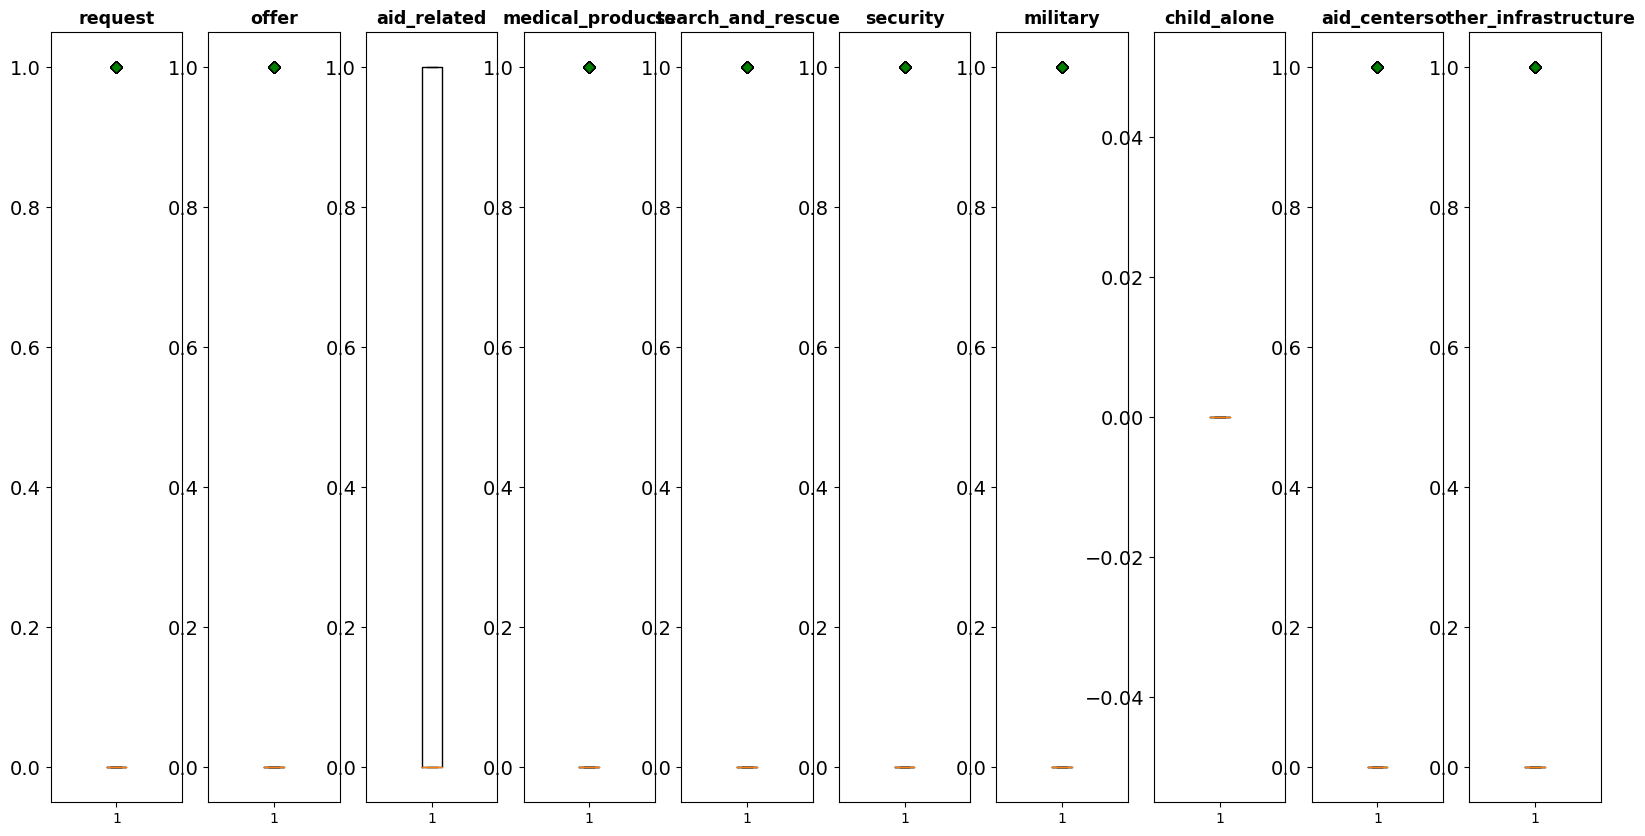

In [20]:
categories_cols = ["request", "offer", "aid_related", "medical_products", "search_and_rescue" ,"security", 
        "military","child_alone","aid_centers","other_infrastructure"]
box_df = categories[categories_cols]
green_diamond = dict(markerfacecolor='green', marker='D')
fig , axs = plt.subplots(1,len(box_df.columns),figsize= (20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(box_df.iloc[:,i],flierprops=green_diamond)
    ax.set_title(box_df.columns[i],fontsize = 12.6,fontweight="bold")
    ax.tick_params(axis="y",labelsize =14)